## Cluster training proteins for fold splitting

https://github.com/bbuchfink/diamond/wiki/Clustering

In [1]:
diamond_dir = '../../output/diamond'

In [4]:
%%time
!../../diamond/diamond cluster \
  -d $diamond_dir/train_data.dmnd \
  -o $diamond_dir/diamond_cluster.tsv \
  --header \
  --approx-id 50 \
  -M 64G

/bin/bash: /home/joni/miniconda3/envs/cafa5/lib/libtinfo.so.6: no version information available (required by /bin/bash)
diamond v2.1.8.162 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 12
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Opening the input file...  [0.373s]
Input database: ../../output/diamond/train_data.dmnd (142246 sequences, 78752603 letters)
Temporary directory: ../../output/diamond
#Target sequences to report alignments for: unlimited
Database: ../../output/diamond/train_data.dmnd (type: Diamond database, sequences: 142246, letters: 78752603)
Block size = 12800000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Seeking in database...  [0s]
Loading query sequences...  [0.149s]
Length sorting queries... 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
cluster_df = pd.read_csv('../../output/diamond/diamond_cluster.tsv', sep='\t')
cluster_df.head()

,centroid,member
0,P20536,P20536
1,O95231,O95231
2,P54366,P54366
3,P33681,P33681
4,P77596,P77596


In [13]:
cluster_df.centroid.value_counts()

centroid
Q59EJ3        127
A5A3E0        111
Q05481        107
A0A0B4J269    100
P36406         97
             ... 
Q2PS07          1
O22194          1
Q700C7          1
Q9QUL0          1
P20536          1
Name: count, Length: 66206, dtype: int64

Text(0.5, 0, 'Frequency')

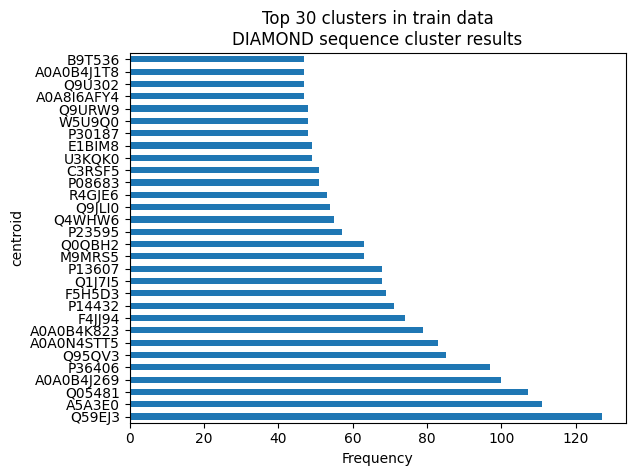

In [21]:
cluster_df.centroid.value_counts()[:30].plot(kind='barh')
plt.title('Top 30 clusters in train data\nDIAMOND sequence cluster results')
plt.xlabel('Frequency')

## Assign each cluster with less than 10 occurences to "unique" cluster id

In [24]:
unique = cluster_df.centroid.value_counts().to_dict()

In [25]:
cluster_df['cluster_id'] = cluster_df['centroid'].apply(lambda x : x if cluster_counts[x] > 10 else "unique")
cluster_df['cluster_id'].value_counts()

cluster_id
unique        113740
Q59EJ3           127
A5A3E0           111
Q05481           107
A0A0B4J269       100
               ...  
G5EBK8            11
Q9UTM4            11
Q99500            11
C8V523            11
A0A0R4IHP8        11
Name: count, Length: 1591, dtype: int64

## Save to pandas dataframe

In [26]:
train_protein_ids = np.load('../../input/t5embeds/train_ids.npy')
train_protein_ids[:10]

array(['P20536', 'O73864', 'O95231', 'A0A0B4J1F4', 'P54366', 'P33681',
       'P77596', 'Q16787', 'Q59VP0', 'P13508'], dtype='<U10')

In [28]:
cluster_ids = [cluster_df[cluster_df['member'] == _id]['cluster_id'].values[0] for _id in train_protein_ids]

In [41]:
train_cluster_df = pd.DataFrame({
    'EntryID' : list(train_protein_ids),
    'cluster_id' : cluster_ids
})
train_cluster_df.head()

,EntryID,cluster_id
0,P20536,unique
1,O73864,unique
2,O95231,unique
3,A0A0B4J1F4,unique
4,P54366,unique


In [42]:
train_cluster_df.to_csv('../../input/train_sequence_clusters.csv' ,index=False)